## Setup & Load Data

In [3]:
import tensorflow as tf
import os

In [4]:
gpus = tf.config.experimental.list_physical_devices("GPU")
gpus

[]

In [19]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [5]:
for gpu in gpus:
    # Avoid out of memory errors by setting GPU Mem Consumption Limit
        try:
            tf.config.experimental.set_memory_growth(gpu, True)
        except:
            print("Required hardware not detected!")

In [24]:
img = cv2.imread(os.path.join('data', 'happy' , "35438_hd.jpg"))
img.shape

(649, 1240, 3)

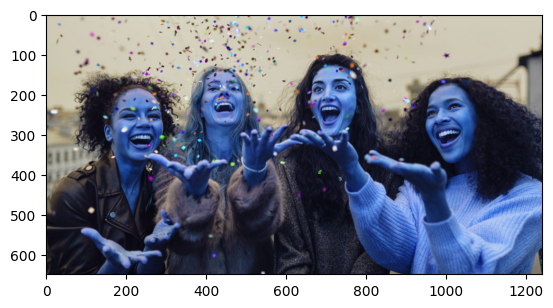

In [28]:
plt.imshow(img)

In [11]:
data_dir = "data"

In [12]:
os.listdir(data_dir)

['happy', 'sad']

In [13]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [27]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        #print(image_path)
        try:
            #img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            #print("Tip = " + tip)
            if tip not in image_exts:
                print("Image not in ext list {}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Invalid image: {}".format(image_path))
        
            

## Load Data

In [43]:
import numpy as np


In [44]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 144 files belonging to 2 classes.


In [45]:
data_iterator = data.as_numpy_iterator()

In [46]:
batch = data_iterator.next()

In [47]:
len(batch) # contains images and labels (classes)

2

In [48]:
batch[0].shape

(32, 256, 256, 3)

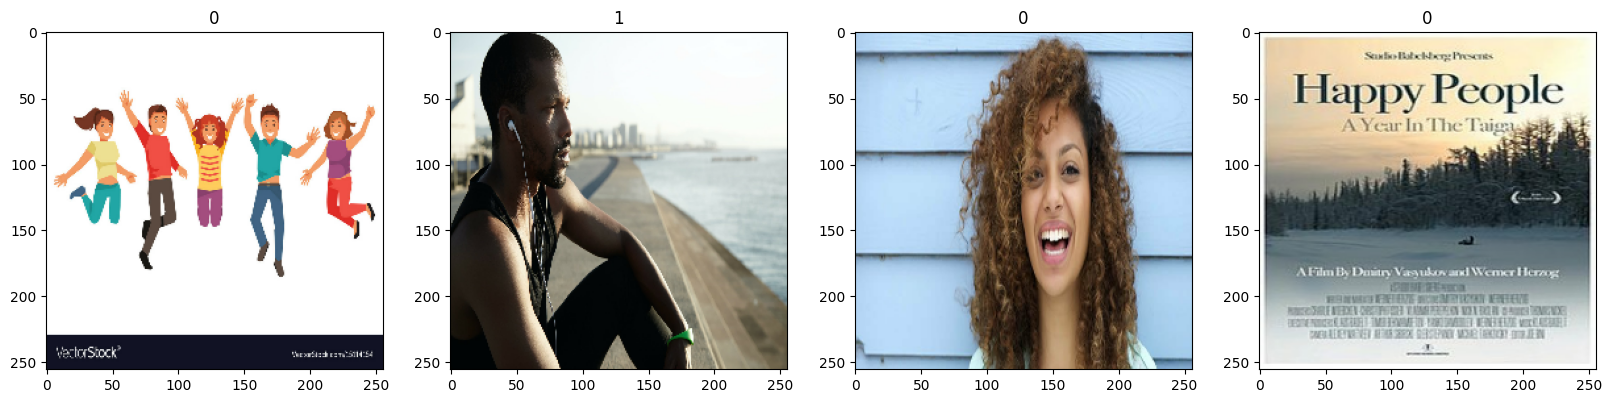

In [49]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])